#Construindo um modelo de Regressão para marketing
Yuri Faleiro

Trabalho requisitado para o desafio de número 4 da formação em Dados da Escola DNC


---



##Objetivo

Analisar uma base de dados de um cliente fictício que contem dados sobre o investimento em marketing através das plataformas Youtube, Facebook e jornais; e o valor gerado das vendas. Para a parte de análise, faremos uma análise descritiva e exploratória dos dados, com o objetivo de entender melhor as variáveis, encontrar possíveis problemas com os dados, correlacionar as variáveis e identificar desvios e outliers.

Além disso, o cliente deseja um modelo simples de regressão para fazer previsões do retorno de vendas a partir de uma determinada combinação de investimento em publicidade nas plataformas utilizadas.

**Esclarecimento**

Devido a ausência de maiores informações descritivas sobre a base de dados, interpretarei os valores na moeda _unidade monetária_ (abreviado como: UM)

#Preparação

In [ ]:
# Importando bibliotecas necessárias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [ ]:
# Carregando base de dados
df = pd.read_csv('MKT.csv')

# Check se a base foi importada
df.head()

,youtube,facebook,newspaper,sales
0,84.72,19.20,48.96,12.60
1,351.48,33.96,51.84,25.68
2,135.48,20.88,46.32,14.28
3,116.64,1.80,36.00,11.52
4,318.72,24.00,0.36,20.88


# Análise descritiva dos dados

In [ ]:
# Trazendo as principais estatísticas dos dados
df.describe()

,youtube,facebook,newspaper,sales
count,171.000000,171.000000,171.000000,171.000000
mean,178.021053,27.671579,35.240000,16.922807
std,102.449597,17.913532,24.902918,6.314608
min,0.840000,0.000000,0.360000,1.920000
25%,91.080000,11.700000,13.740000,12.540000
50%,179.760000,26.760000,31.080000,15.480000
75%,262.980000,43.680000,50.880000,20.820000
max,355.680000,59.520000,121.080000,32.400000


A partir desse _describe_ identificamos que temos 171 linhas de dados nessa base.
A maior média de investimento é na plataforma Youtube, seguido pelo jornal e depois pelo Facebook.

Analisando o valor máximo da base de dados de cada variável, é possivel identificar a presença de outliers no investimento em jornais, visto que o seu valor máximo está muito distante da média de valores (aproximadamente 343% maior que a média), sendo que as outras duas plataformas esse valor se aproxima de 100%.

É possivel ver que as três variáveis independentes tiveram cenários em que o valor investido foi nulo ou quase nulo, indicando que pode haver cenários em que o foco do investimento foi em apenas uma ou duas das plataformas.


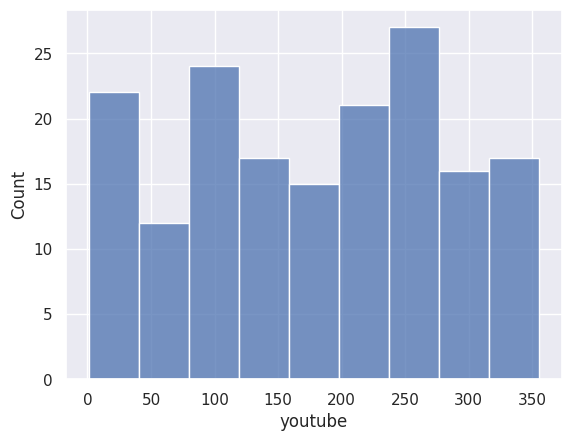

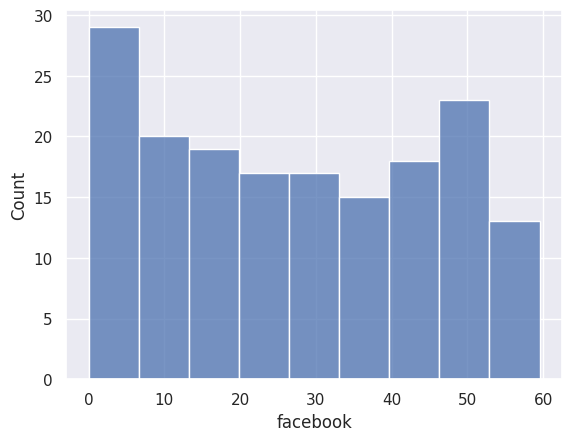

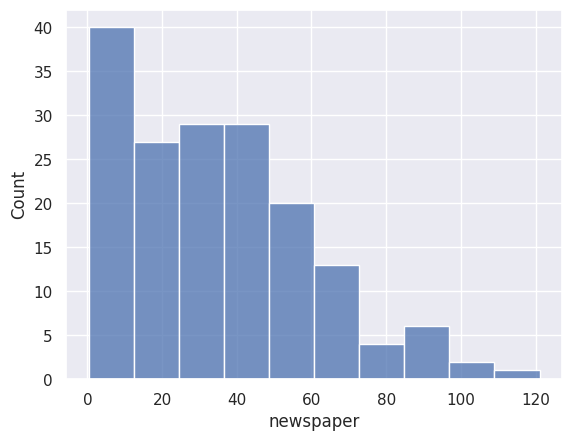

In [ ]:
# Distribuição dos valores investidos no Youtube
sns.set(style="darkgrid")
sns.histplot(data=df, x="youtube")
plt.show()

# Distribuição dos valores investidos no Facebook
sns.set(style="darkgrid")
sns.histplot(data=df, x="facebook")
plt.show()

# Distribuição dos valores investidos em jornais
sns.set(style="darkgrid")
sns.histplot(data=df, x="newspaper")
plt.show()

Analisando a distribuição dos valores de cada variável, é possível identificar que a partir da faixa das 50 UM, a contagem de vezes investidas reduziu bastante, tendo pouquissimas ocorrências já a partir da faixa das 80 UM.

In [ ]:
#Check se todas as colunas são do tipo float
df.dtypes

youtube      float64
facebook     float64
newspaper    float64
sales        float64
dtype: object

#Análise exploratória dos dados

In [ ]:
# Correlação entre variáveis
df.corr()

,youtube,facebook,newspaper,sales
youtube,1.000000,0.086538,0.110759,0.782030
facebook,0.086538,1.000000,0.293425,0.602918
newspaper,0.110759,0.293425,1.000000,0.254987
sales,0.782030,0.602918,0.254987,1.000000


A partir da tabela acima vemos que os três tipos de investimentos em publicidades se correlacionam de forma positiva com o retorno em vendas. Apesar disso, os impactos de cada um são variados, sendo que o investimento em Youtube tem o maior impacto no valor de vendas, seguido pelo Facebook e em último lugar os jornais.

Abaixo, vou trazer a mesma correlação, mas em forma de gráficos, para que possamos identificar visualvemente como cada variável interage com o valor de venda (última linha de gráficos). Além disso, na última linha e última coluna temos a distribuição de valores da variável vendas, que não foi apresentada anteriormente.

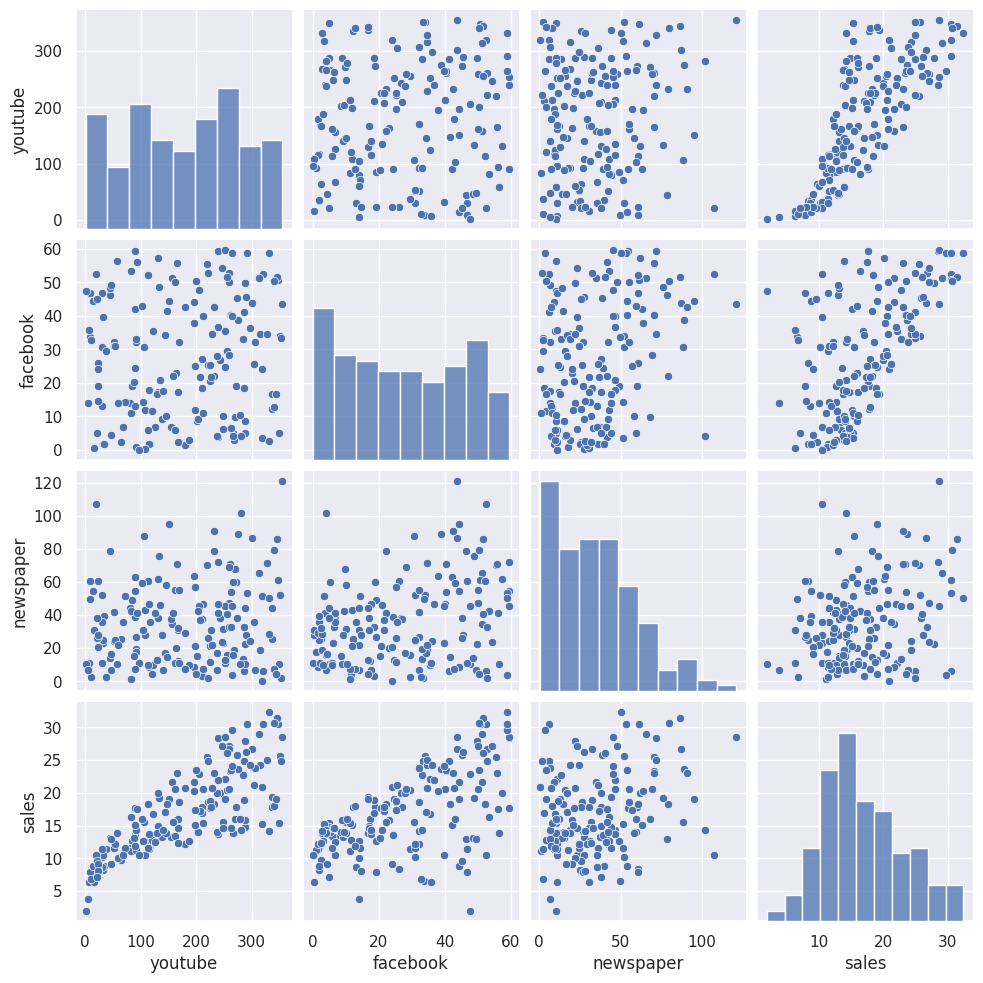

In [ ]:
# Traçando a correlação entre as variáveis da base de dados
sns.pairplot(df);

Como podemos ver na última linha, as três variáveis impactam positivamente o valor das vendas. O gráfico da variável Youtube nos mostra uma correlação bem clara e sem um desvio muito grande, apesar da variância aumentar em investimentos mais altos. O mesmo acontece com a variável Facebook, porem com uma maior variância.

Já a variável _newspaper_ não deixa tão clara essa correlação, apesar de ser possível identificá-la, pois muito dos valores estão concentrados nos menores valores de investimentos e o resultado desses investimentos estão bem dispersos. O significado dessa dispersão é que as outras duas variáveis tem uma maior influência na determinação do valor de venda, então independente do valor investido em jornais, é possível obter um valor alto ou baixo de vendas.

#Modelagem


In [ ]:
# Separando a base de dados em base de treino e base de teste
X = df[["youtube", "facebook", "newspaper"]]
Y = df[["sales"]]

# Treinando o modelo
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=37)

In [ ]:
# Checando a divisão dos datasets de treino e teste
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(136, 3)
(35, 3)
(136, 1)
(35, 1)


In [ ]:
# Fazendo o fit do modelo
lm = LinearRegression()
lm.fit(X_train, Y_train)

# Fazendo predições com o dataset de teste
y_pred = lm.predict(X_test)

# Calculando predição

In [ ]:
# Calculando o R² do modelo
r = r2_score(Y_test, y_pred)

print(r)

0.9202457754701969


O resultado do score r-quadrado nos mostra que os valores da predição se adequaram muito bem aos valores reais. Segue abaixo um gráfico que facilitará a visualização da adequação dos valores previstos para os valores reais:

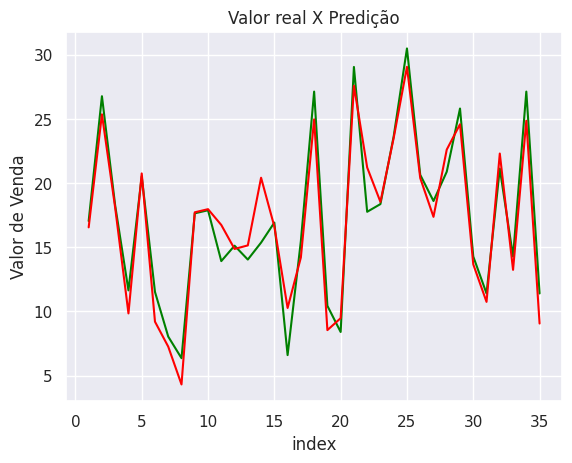

In [ ]:
# Criando um gráfico pra facilitar a visualização do quanto os valores reais e previstos se assemelharam
q = [i for i in range(1, 36, 1)]

plt.plot(q, Y_test, color="green")
plt.plot(q, y_pred, color="red")
plt.xlabel('index')
plt.ylabel('Valor de Venda')
plt.title('Valor real X Predição')
plt.show()

In [ ]:
# Fazendo uma predição com valores aleatórios
rndm_youtube = 210.50
rndm_facebook = 43.20
rndm_newspaper = 5.13

new_pred = [[rndm_youtube, rndm_facebook, rndm_newspaper]]
lm.predict(new_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[21.24758993]])

In [ ]:
# Fazendo nova predição apenas aumentando o valor de investimento em jornal
rndm_youtube = 210.50
rndm_facebook = 43.20
rndm_newspaper = 51.3

new_pred = [[rndm_youtube, rndm_facebook, rndm_newspaper]]
lm.predict(new_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[21.31516173]])

Com as duas previsões acima é possível dizer que o investimento em jornal traz resultados irrisórios para as vendas. Então é possível sugerir para que no futuro o investimento em publicidade nessa plataforma seja pequena ou nula.